# Data project - Predicting customer churn rate for US telecommunications company
  
In this project I will investigate data from a US telecomunications comapany and utilize machine learning to predict customer churn. The dataset is a sample dataset from an unnamed company accessed through Kaggle.com. The dataset is open-source and made available by u/Mobius.

In competitive service-provider industries such as telecommunications, research has suggested it is frequently the case that increasing the retention period of existing customers can provide a greater ROI compared to alternative revenue-increasing strategies.  

Provided a situation where historical data is made available on customer characteristics for both churned and retained customers, predicting customer churn is a binary classification problem. Utilizing modern machine learning methods can therefore be a valuable resource in understanding key features that are associated with customer churn, and assist with identifying customers who are likely candidates.

Construction and deployment of an accurate binary classifier to identify said customers would enable businesses to efficiently target customers who have a high probability of leaving and employ methods to retain them. 





### 1.1 Loading packages and inspecting data

In [1]:
# Data and math packages
import pandas as pd
import numpy as np
import math

#Vizualization packages
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

#Packages for processing data
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

C:\Users\james\anaconda3\lib\site-packages\geopandas\_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
C:\Users\james\AppData\Local\Temp\ipykernel_18084\4215923903.py:9: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be smooth. However, if you a

In [2]:
# Importing data
original_data =pd.read_csv(r"C:\Telecom Sales Data Project\Telecom_Sales_data.csv")
df = original_data.copy()
print('Shape: ' + str(df.shape))
df.head()


Shape: (3333, 21)


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
#Checking null values
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [4]:
# Inspecting numerical variables
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [5]:
# Inspecting categorical variables
print('Value Counts of categorical variables (limit 5)')
print(' ')
print( 'Number of unique states: ' + str(df['state'].nunique()))
print(' ')
print(df['international plan'].value_counts())
print(' ')
print(df['voice mail plan'].value_counts())
print(' ')
print(df['churn'].value_counts())
print(' ')
print(df['area code'].value_counts())

Value Counts of categorical variables (limit 5)
 
Number of unique states: 51
 
no     3010
yes     323
Name: international plan, dtype: int64
 
no     2411
yes     922
Name: voice mail plan, dtype: int64
 
False    2850
True      483
Name: churn, dtype: int64
 
415    1655
510     840
408     838
Name: area code, dtype: int64


In [6]:
df.columns
num_cols = ['customer service calls', 'number vmail messages' , 'total day minutes', 'total day calls', 
               'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 
               'total night minutes', 'total night calls', 'total night charge', 'total intl calls', 
               'total intl charge', 'churn']
df_churn = df[num_cols]
num_cols = num_cols[:-1]


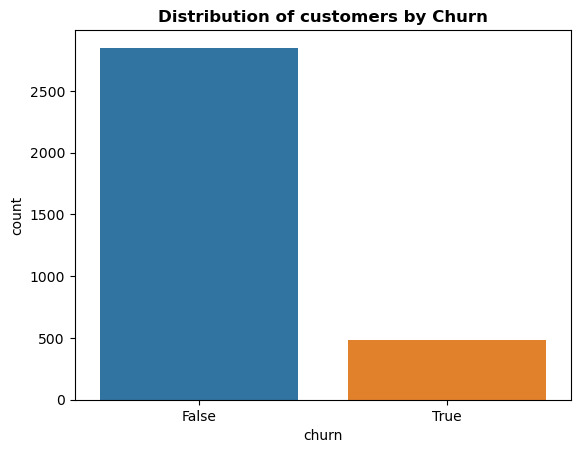

In [7]:
plt.title('Distribution of customers by Churn', fontweight = 'bold')
sns.barplot(data = df.groupby('churn')['total day charge'].\
            count().to_frame('count').reset_index(), x = 'churn', y ='count')
plt.show()



In [8]:
df['churn'].sum() / df['churn'].count()

0.14491449144914492

In [9]:
num_cols

['customer service calls',
 'number vmail messages',
 'total day minutes',
 'total day calls',
 'total day charge',
 'total eve minutes',
 'total eve calls',
 'total eve charge',
 'total night minutes',
 'total night calls',
 'total night charge',
 'total intl calls',
 'total intl charge']

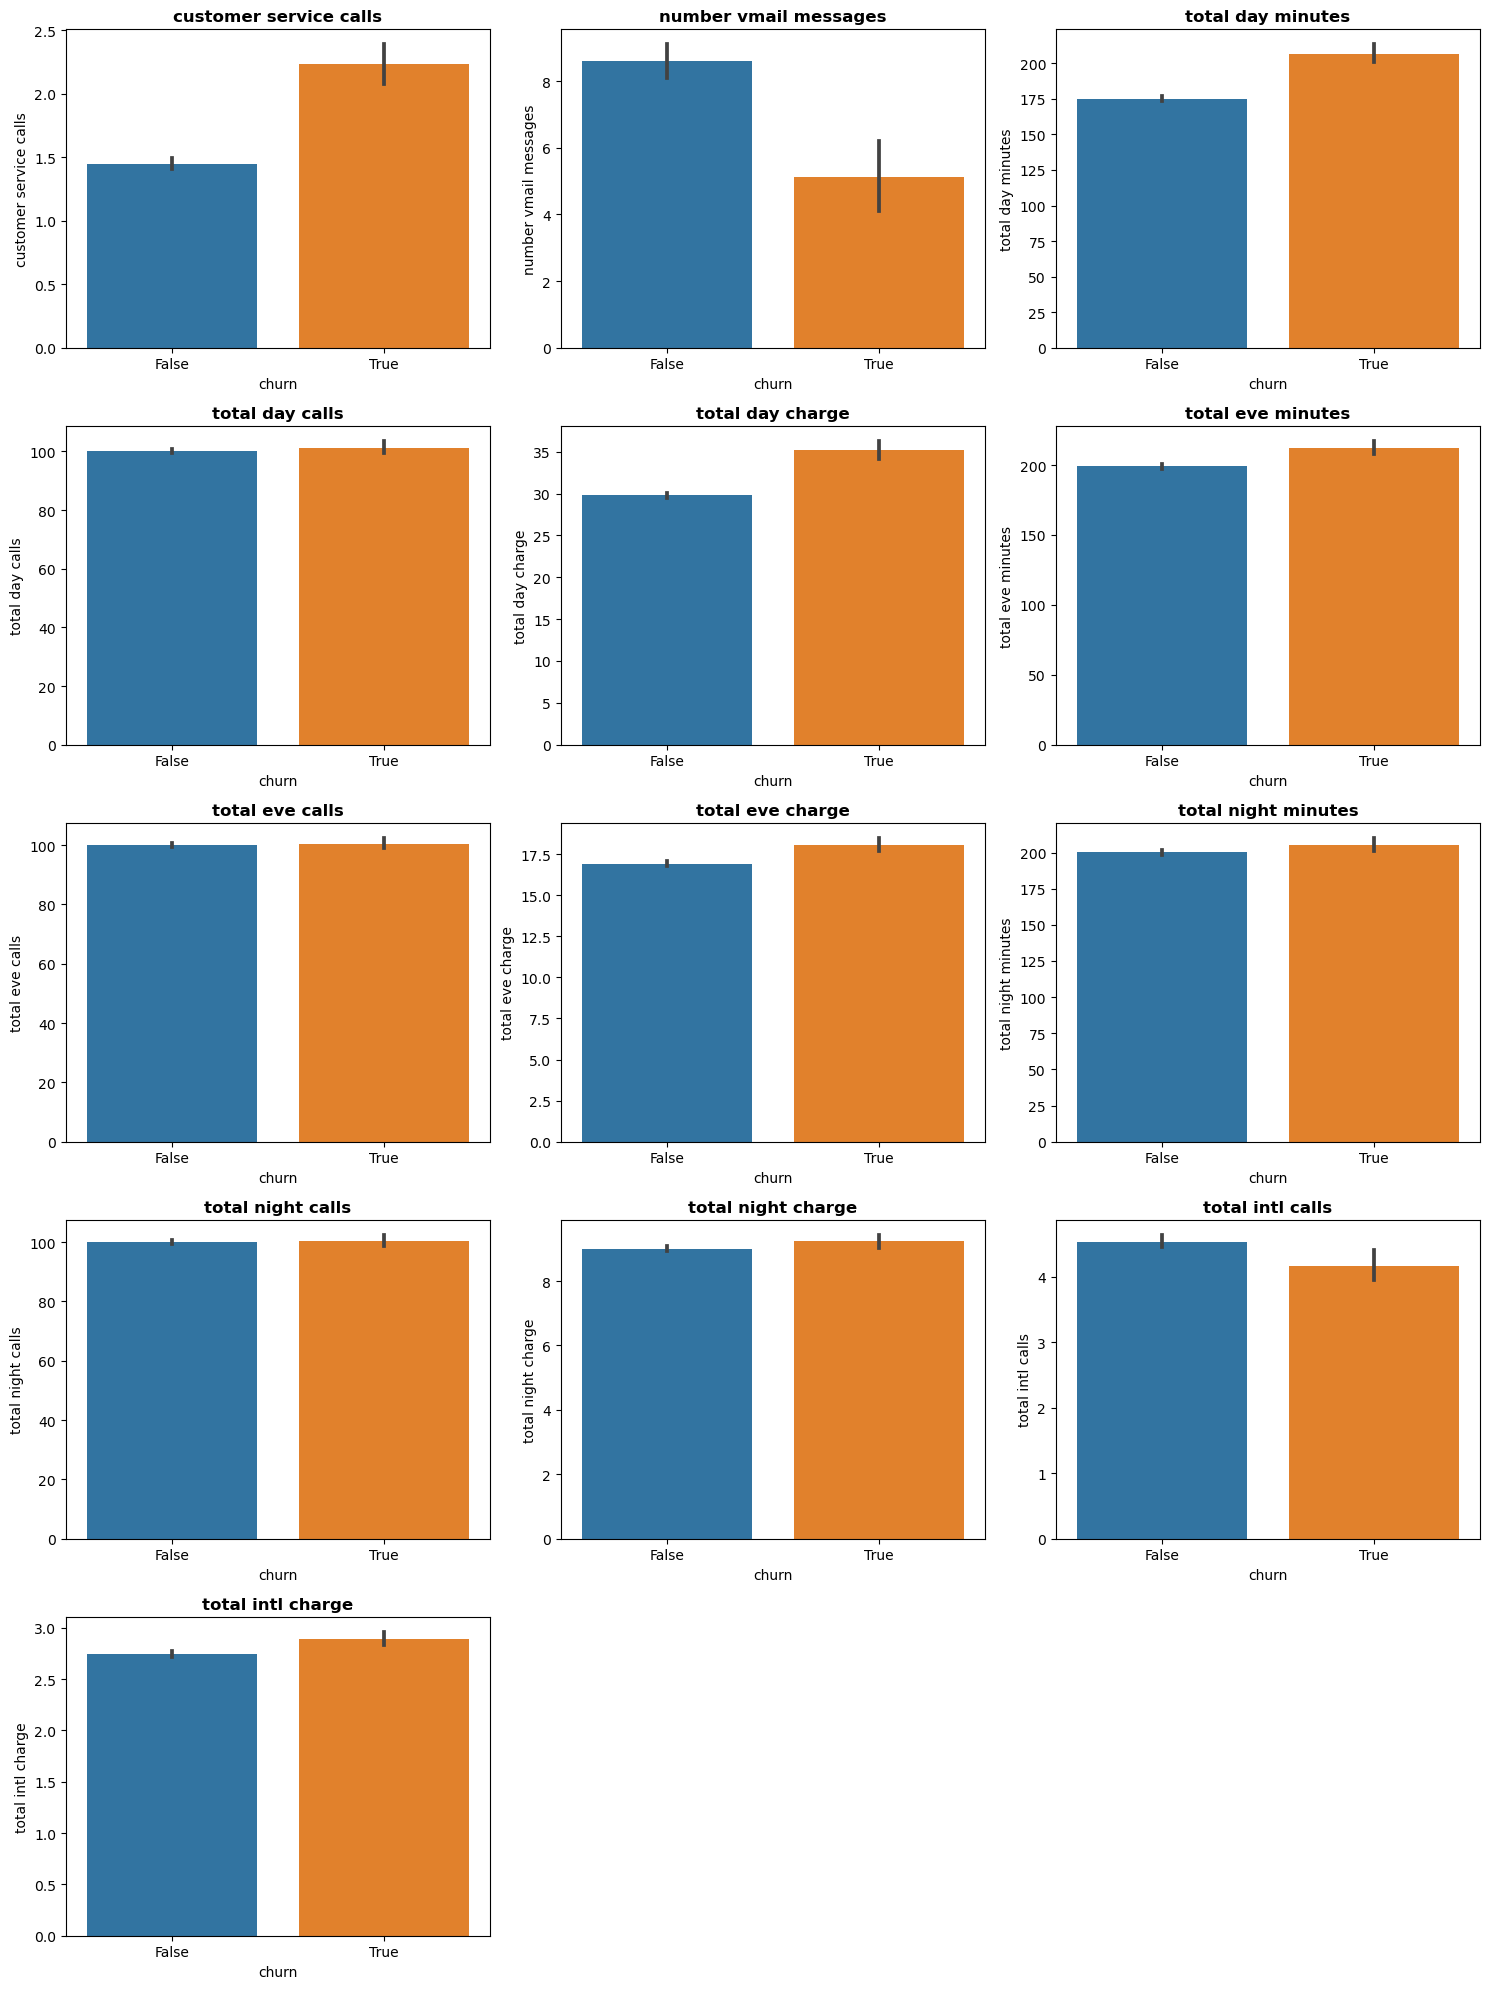

In [11]:
fig, axs = plt.subplots(5, 3, figsize=(15, 20))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# Flatten the array of axes
axs = axs.ravel()

for i, col in enumerate(num_cols):
    sns.barplot(x='churn', y=col, data=df_churn, ax=axs[i])
    axs[i].set_title(col, fontweight='bold')  # This line sets the title of each subplot to its corresponding column name
    
# Removing unneeded subplots.
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()


plt.savefig('churn5.jpg', dpi=300) 

plt.show()


#### Observations:
There are four categorical variables in the dataset. International plan, voice mail plan, churn and area code consist of 3 or less groups and can be encoded and modelled.

Due to the high number of unique states (51), we will remove the states variable from any modelling activities in order to avoid the issues associated with high dimensionality. 

It will therefore be worthwhile investigating the distribution of customer churn by state before we create the model.

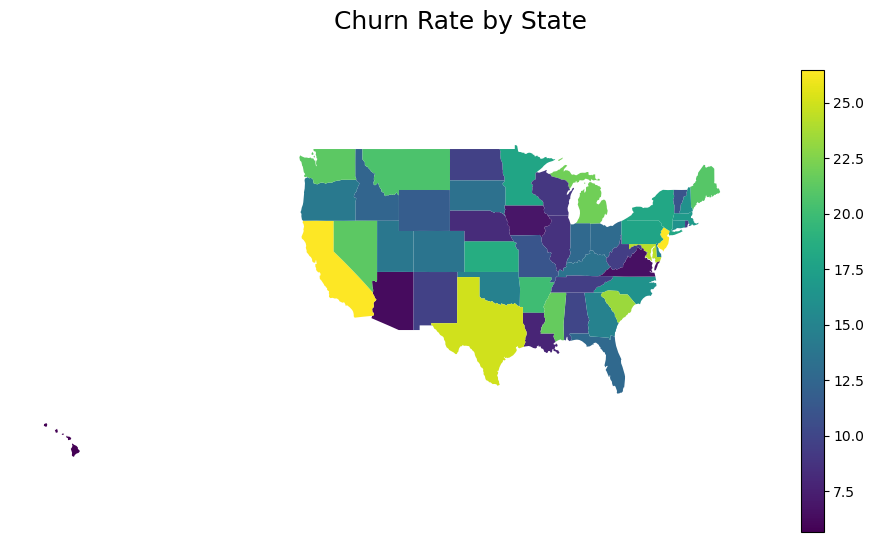

Top 5 churn rates by State: 
 
   state  count  sum  churn_rate (%)
4     CA     34    9           26.47
31    NJ     68   18           26.47
43    TX     72   18           25.00
20    MD     70   17           24.29
40    SC     60   14           23.33
 
count    50.000000
mean     14.667000
std       5.678838
min       5.660000
25%       9.680000
50%      13.765000
75%      18.445000
max      26.470000
Name: churn_rate (%), dtype: float64


In [12]:
#Group by state and retrieve count of all customers and churned customers
churn_by_state = df.groupby('state')['churn'].agg(['count', 'sum']).reset_index()
#Percentage of churned customers per state
churn_by_state['churn_rate (%)'] = round((churn_by_state['sum']/churn_by_state['count']) * 100, 2)
churn_by_state = churn_by_state[churn_by_state['state'] != 'AK']

#Importing US state geodata for visualization
us_states = gpd.read_file('https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json')
#Standard dictionary to convert state ID's
states = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

# Apply the mapping to the geopandas dataframe
us_states['name'] = us_states['name'].map(states)

#Adding churn data to us state geodata.
us_states = pd.merge(us_states,churn_by_state, left_on =
                     'name', right_on = 'state', how = 'left').drop(columns = ['name'])

#Creating a plot to visualize churn rates
fig, ax = plt.subplots(1, 1, figsize = (12,6))
us_states.plot(column='churn_rate (%)', ax=ax, legend=True)
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')
plt.suptitle('Churn Rate by State', fontsize = 18)

plt.show()

print('Top 5 churn rates by State: ') 
print(' ')
print(churn_by_state.sort_values('churn_rate (%)', ascending = False).head(5))
print(' ')
print(churn_by_state['churn_rate (%)'].describe())

#### Observations:

* There is a reasonable variation in the Churn rate by state. 
* The churn rates range from 25% + to just over 5%.

This may warrant further investigation of some states have a much higher churn rate than others, or it may be a reflection of the relative competitiveness in the industry within states.

Based on a quick glimpse of the choropleth, it does appear that the states with high churn rate are some of the larger markets in the US (CA, TX, NJ etc).

For the purposes of predicting churn rates, we will not take the customer's location (state) into consideration. 


### 2.2 Preparing data for modelling

In [15]:
#Ecoding categorical variables

#Area_code
area_dummies = pd.get_dummies(df['area code'], prefix = 'area_code').drop(columns = ['area_code_415'])
df = pd.concat([df, area_dummies], axis = 1).copy()

In [16]:
#international plan
df['international plan'].loc[df['international plan'] == 'no'] = 0
df['international plan'].loc[df['international plan'] == 'yes'] = 1
df['international plan'] = df['international plan'].astype(int)
#voice mail plan
df['voice mail plan'].loc[df['voice mail plan'] == 'no'] = 0
df['voice mail plan'].loc[df['voice mail plan'] == 'yes'] = 1
df['voice mail plan'] = df['voice mail plan'].astype(int)

# Churn
df['churn'].loc[df['churn'] == False] = 0
df['churn'].loc[df['churn'] == True] = 1
df['churn'] = df['churn'].astype(int)

# Removing original categorial columns
df_model = df.drop(columns = ['state', 'phone number', 'area code'])
df_model.head()

C:\Users\james\AppData\Local\Temp\ipykernel_18084\2421246222.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['international plan'].loc[df['international plan'] == 'no'] = 0
C:\Users\james\AppData\Local\Temp\ipykernel_18084\2421246222.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['international plan'].loc[df['international plan'] == 'yes'] = 1
C:\Users\james\AppData\Local\Temp\ipykernel_18084\2421246222.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,area_code_408,area_code_510
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,1,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,0,0


#### Observations:

* The company makes more from day call charges than it does from night call charges.
* Most of the variables follow a normal distribution
* Distribution of international calls is skewed to the right
* Most customers are not on an international plan
* About 25% are on a voice mail plan

#### 2.3 Checking correlation between variables

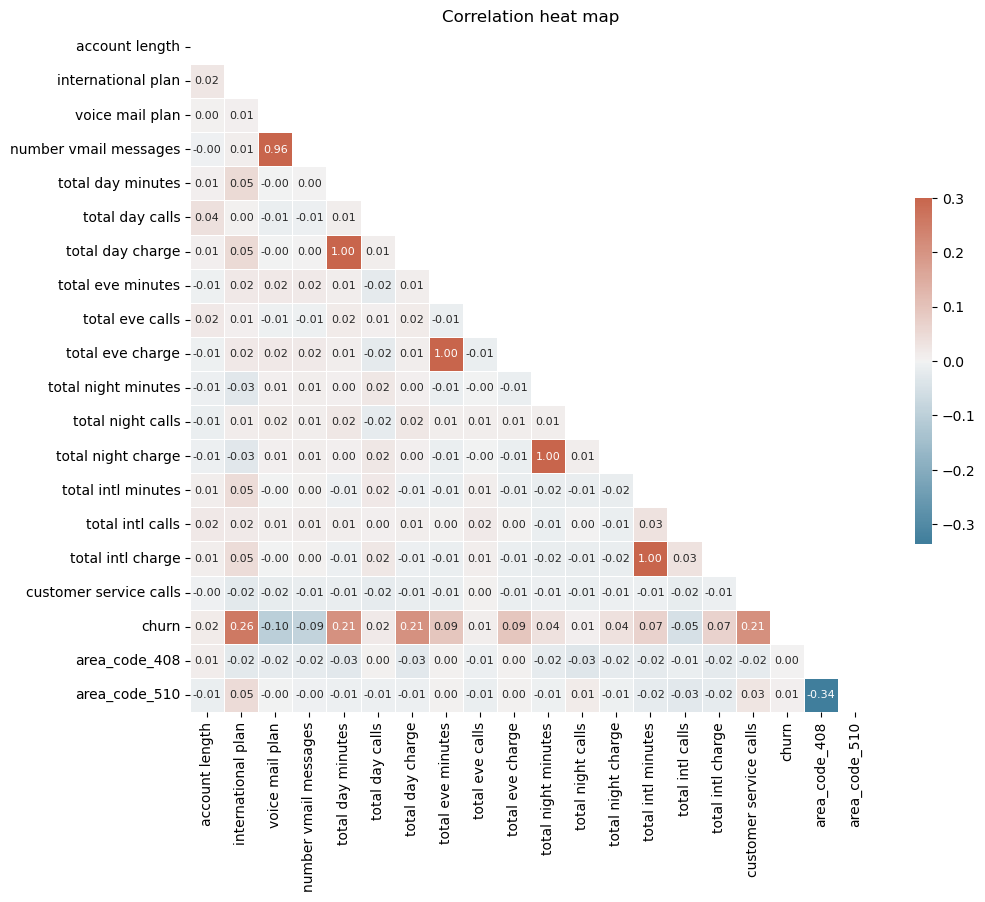

In [17]:
corr = df_model.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
ax = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True, 
            annot_kws={"size": 8}, fmt=".2f")  # specify number format here
ax.set_title('Correlation heat map')
plt.show()


#### Observations:

#### The following variables are negatively correlated with customer churn:
* International plan
* Total day minutes
* total day charge
* total eve minutes
* total eve charge
* total night minutes
* total night charge
* total intl minutes
* total intl charge
* customer service calls

#### The following variables are positively correlated with customer churn:
* voice mail plan
* number vmail messages
* total intl calls

#### The following variables have high collinearity:
* number vmail messages : voice mail plan
* total day charge : total day minutes
* total eve charge : total eve minutes
* total itl charge : total intl minutes

#### 2.4 Determining Feature importances for variables
We will use a simple random forrest classifier to ascertain feature importances.

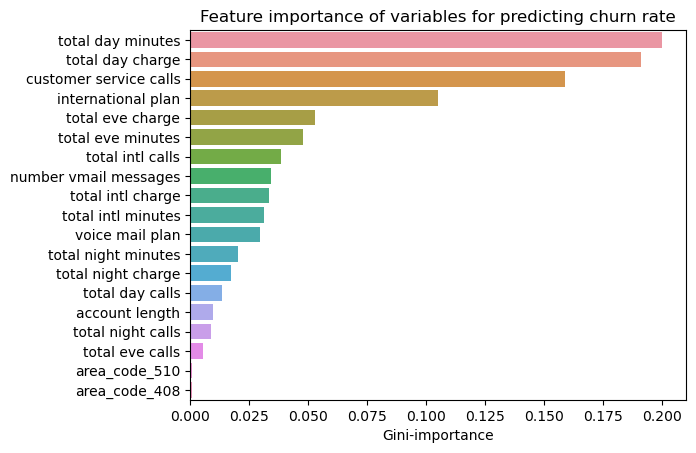

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

l = preprocessing.LabelEncoder()
# apply label encoder for churn since its values are also categories
y = l.fit_transform(df_model["churn"])

X = df_model.drop(columns=["churn"])

# train-test split
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# selected features are selected in multicollinearity check part
feature_names = [f"feature {i}" for i in range((X.shape[1]))]
forest =  RandomForestClassifier(max_depth=5)
forest.fit(X_train, y_train)
feats = {} 
for feature, importance in zip(df_model.drop(columns=["churn"]).columns, forest.feature_importances_):
    feats[feature] = importance r 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})\
.sort_values(by='Gini-importance', ascending = False)
importances
fig = sns.barplot( y = importances.index , x = importances['Gini-importance'])
fig.set_title('Feature importance of variables for predicting churn rate')
plt.show()

Gini-importance shows us which features would be most useful if we build a tree-based model with given features. According to the analysis above, the most important three features of churn are: total day charge, total day minutes, and customer service calls.

#### 3.1 Fitting and evaluating Machine Learning Models
In this section we will fit a number of popular machine learning models and evaluate classification accuracy.

The models I have chosen to test are:
* Nearest Neighbours
* Linear SVM
* RBF SVM
* Decision Tree
* Random Forest
* Neural Net
* AdaBoost
* Naive Bayes
* QDA
* XGBoost
* LightGBM

In [19]:
#Packages for machine learning models
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier 
import sklearn.metrics as metrics

In [20]:
le = preprocessing.LabelEncoder()
# apply label encoder for churn since its values are also categories
y = le.fit_transform(df_model["churn"])
X = df_model.drop(columns=["churn"])
#Scaling predictor variables
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
    "XGBoost",
    "LightGBM"
]

# Hypterparameters were chosen via iterative trial and error + intuition
classifiers = [

    KNeighborsClassifier(3), 
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(max_depth=5, random_state=42),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    AdaBoostClassifier(random_state=42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', seed=0),
    LGBMClassifier(random_state=42),
]

C:\Users\james\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [21]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

In [22]:
for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        acc_score = clf.score(X_test, y_test)
        y_pred = clf.predict(X_test)
        f_score = f1_score(y_test, y_pred, average='macro')
        r_score = recall_score(y_test, y_pred)
        print("accuracy:", "{:.2f}".format(acc_score), "f1_score:", "{:.2f}".format(f_score),"Recall_score:", "{:.2f}".format(r_score), "Model:", name)

accuracy: 0.89 f1_score: 0.73 Recall_score: 0.39 Model: Nearest Neighbors
accuracy: 0.85 f1_score: 0.46 Recall_score: 0.00 Model: Linear SVM
accuracy: 0.85 f1_score: 0.46 Recall_score: 0.00 Model: RBF SVM
accuracy: 0.94 f1_score: 0.86 Recall_score: 0.67 Model: Decision Tree
accuracy: 0.91 f1_score: 0.76 Recall_score: 0.41 Model: Random Forest
accuracy: 0.93 f1_score: 0.85 Recall_score: 0.61 Model: Neural Net
accuracy: 0.88 f1_score: 0.70 Recall_score: 0.37 Model: AdaBoost
accuracy: 0.85 f1_score: 0.70 Recall_score: 0.46 Model: Naive Bayes
accuracy: 0.86 f1_score: 0.71 Recall_score: 0.47 Model: QDA
accuracy: 0.96 f1_score: 0.91 Recall_score: 0.78 Model: XGBoost
accuracy: 0.96 f1_score: 0.91 Recall_score: 0.76 Model: LightGBM


#### Observations
* The highest F1 Score (Harmonic mean of precision and recall) was produced by the Extreme Gradient Boosting and Light gradient boosting machine models. With an accuracy of 0.96 and F1 score  of 0.91, the model performs well in predicting customer churn on the test data.


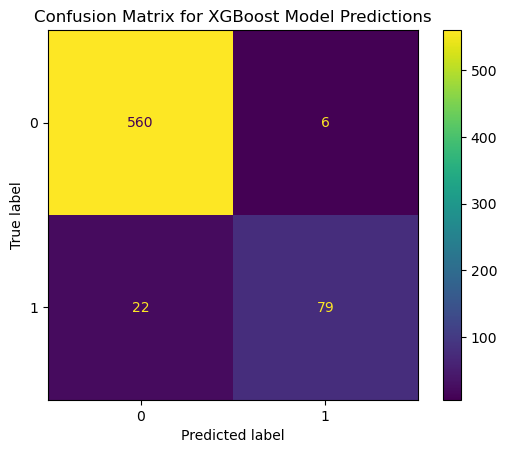

In [23]:
clf_xgb = XGBClassifier(eval_metric='mlogloss', seed=0).fit(X_train, y_train)
y_preds = clf_xgb.predict(X_test)

cm = metrics.confusion_matrix(y_test, y_preds, labels = clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = clf.classes_)
disp.plot()
plt.title('Confusion Matrix for XGBoost Model Predictions')
plt.show()

In [24]:
# Initializing graphviz for visualizing the decision making process
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files\Graphviz'


Visualizing the Decision Tree Process - Extreme Gradient Boosting Machine

accuracy: 0.96 f1_score: 0.91


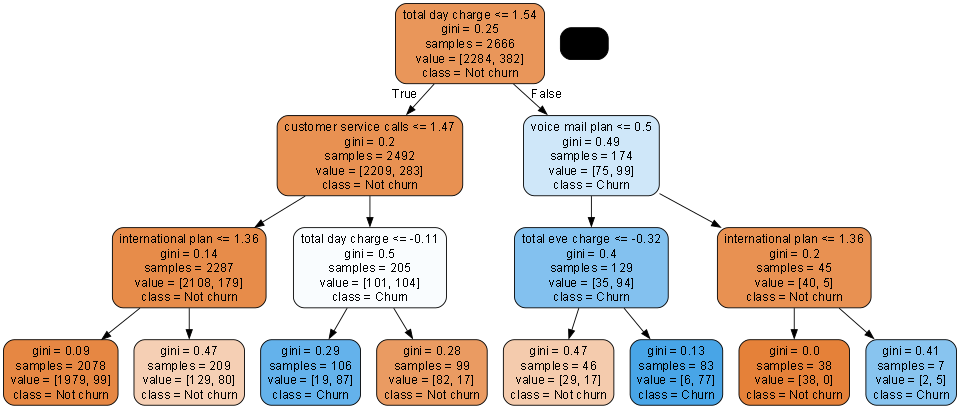

In [25]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import SVG,display, Image
import pydotplus

def plot_decision_tree(maximum_depth,criterion_type,split_type) :
    
 
    #model
    clf = DecisionTreeClassifier(max_depth=3)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print("accuracy:", "{:.2f}".format(acc_score), "f1_score:", "{:.2f}".format(f_score))
    
    #plot decision tree
    graph = tree.export_graphviz(clf,out_file=None,
                                        rounded=True,proportion = False,
                                        feature_names = df_model.drop(columns=["churn"]).columns.to_list(), 
                                        precision  = 2,
                                        class_names=["Not churn","Churn"],
                                        filled = True,
                                       
                  )
    
    pydot_graph = pydotplus.graph_from_dot_data(graph)
    pydot_graph.set_size('"10,10"')
    plt = Image(pydot_graph.create_png())
    display(plt)

print("\nVisualizing the Decision Tree Process - Extreme Gradient Boosting Machine\n")
plot_decision_tree(3, criterion_type = 'gini', split_type = 'best')


#### Machine Learning Models

Abu-Elkheir, M., Hayajneh, M., & Ali, N. A. (2019). Data science of the people, for the people, by the people: A viewpoint on an emerging dichotomy. Journal of Big Data, 6(1), 20. https://doi.org/10.1186/s40537-019-0191-6